In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
import warnings
warnings.filterwarnings("ignore")

In [139]:
df = pd.read_csv('Marketing_Analysis.csv')
df.head(5)

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [140]:
#should get rid of first 2 rows
df = pd.read_csv('Marketing_Analysis.csv',skiprows=2)
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no


In [141]:
df.shape

(45211, 19)

In [142]:
#drop the customer id as it is of no use
df.drop('customerid', inplace= True,axis=1)

In [143]:
#split the 'job' and 'education' from 'jobedu' column
df['job'] = df['jobedu'].apply(lambda x:x.split(',')[0])
df['education'] = df.jobedu.apply(lambda x:x.split(',')[1])

In [144]:
# since dont need 'jobedu' column
df.drop('jobedu',axis=1,inplace=True)

In [145]:
df.head(1)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary


In [146]:
#checking the null values
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [147]:
#want to see anomalies in age==null  df
df[df.age.isnull()].describe()

,age,salary,balance,day,campaign,pdays,previous
count,0.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,NaN,57450.000000,999.700000,16.100000,2.750000,77.650000,1.35000
std,NaN,36153.874365,2117.574906,8.908305,2.099499,187.342432,3.09966
min,NaN,8000.000000,-2082.000000,5.000000,1.000000,-1.000000,0.00000
25%,NaN,20000.000000,-20.250000,8.000000,1.000000,-1.000000,0.00000
50%,NaN,60000.000000,287.500000,14.000000,2.000000,-1.000000,0.00000
75%,NaN,77500.000000,1125.250000,26.500000,4.250000,22.250000,0.50000
max,NaN,120000.000000,8112.000000,29.000000,8.000000,774.000000,11.00000


In [148]:
df.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [149]:
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [150]:
# median looks fine to fill
df.age.fillna(39,inplace=True)

In [151]:
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [152]:
# now month column
df[df.month.isnull()].describe()

,age,salary,balance,day,campaign,pdays,previous
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,38.600000,56160.000000,1643.480000,14.820000,3.50000,29.980000,0.240000
std,9.676397,29912.361788,2992.340557,7.742514,5.27702,85.513691,0.656521
min,22.000000,4000.000000,-41.000000,3.000000,1.00000,-1.000000,0.000000
25%,32.250000,20000.000000,142.500000,8.000000,1.00000,-1.000000,0.000000
50%,36.000000,60000.000000,482.500000,14.000000,2.00000,-1.000000,0.000000
75%,45.750000,70000.000000,1252.500000,19.000000,3.00000,-1.000000,0.000000
max,56.000000,120000.000000,13450.000000,31.000000,31.00000,346.000000,3.000000


In [153]:
df.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.934795,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.616926,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [154]:
# since month column is object type will use mode
df.month.fillna(df.month.mode()[0],inplace=True)
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [155]:
# response column will be target column so filling this column can effect our analysis , better drop missing values.
df[df.response.isnull()].shape

(30, 19)

In [156]:
df = df[~df.response.isnull()]     

In [132]:
df.shape

(45181, 19)

In [157]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

# Univariate Analysis

In [160]:
#lets analyze the job category.
df.job.value_counts()

blue-collar      9727
management       9454
technician       7592
admin.           5166
services         4150
retired          2263
self-employed    1575
entrepreneur     1486
unemployed       1303
housemaid        1239
student           938
unknown           288
Name: job, dtype: int64

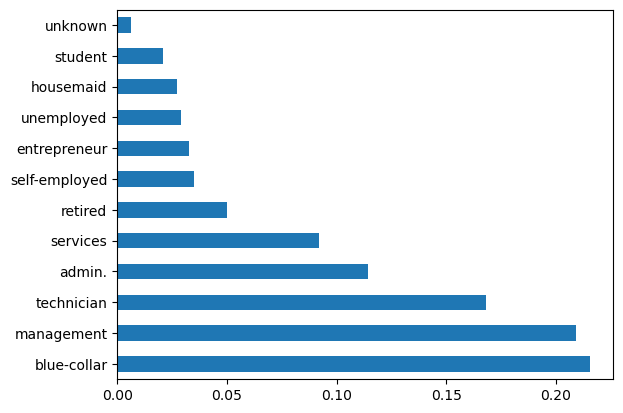

In [164]:
df.job.value_counts(normalize = True).plot.barh()
plt.show();


In [177]:
df.education.value_counts()

secondary    23189
tertiary     13292
primary       6844
unknown       1856
Name: education, dtype: int64

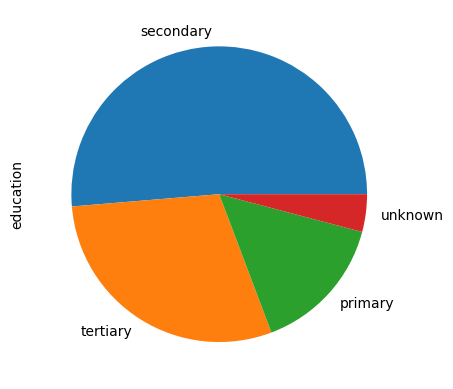

In [176]:
df.education.value_counts().plot.pie();

# Bivariate Analysis

In [165]:
df.salary.describe()

count     45181.000000
mean      57005.046369
std       32089.163369
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

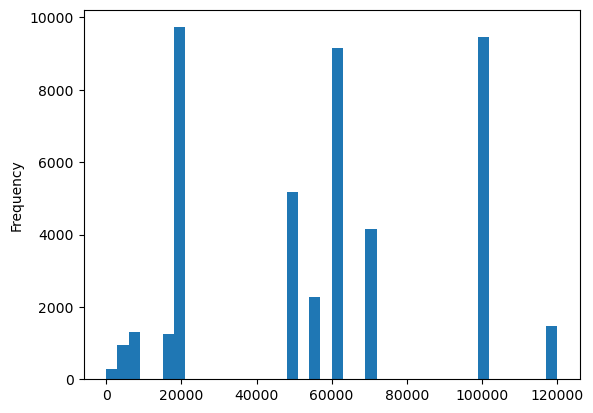

In [173]:
df.salary.plot.hist(bins = 40);

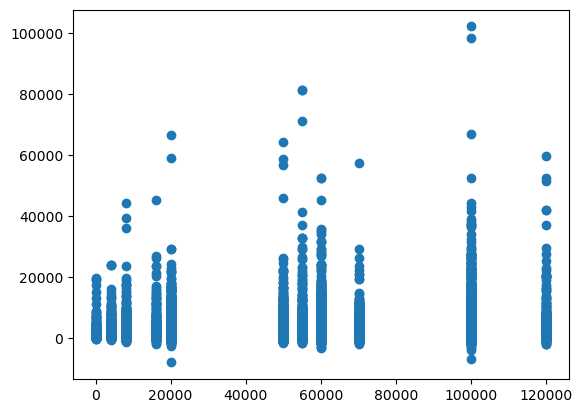

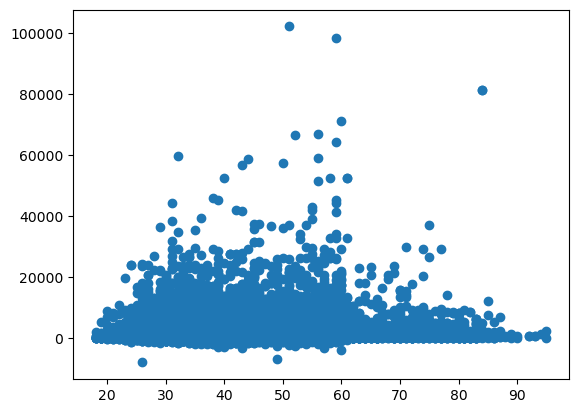

In [183]:
# lets check relation between salary, age and balance columns 
plt.scatter(df.salary,df.balance)
plt.show()
plt.scatter(df.age,df.balance);
plt.show()

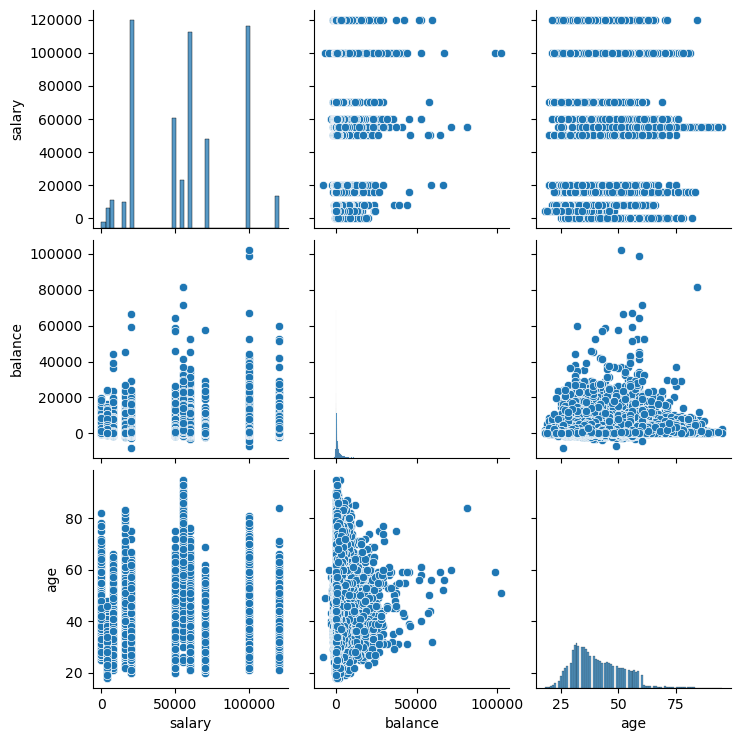

In [185]:
sns.pairplot(data = df, vars = ['salary','balance','age']);

<AxesSubplot:>

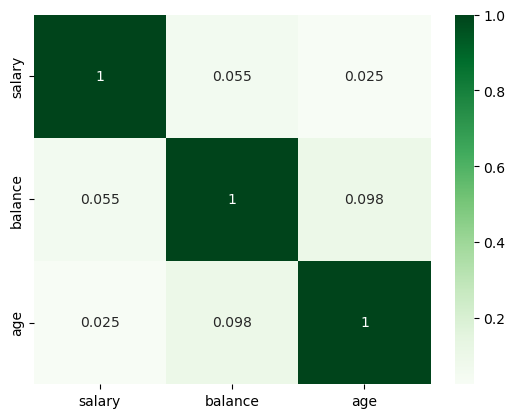

In [191]:
sns.heatmap(data=df[['salary','balance','age']].corr(),annot =True,cmap = 'Greens')

In [193]:
# now will check for mean salary grouping response answers
df.groupby('response')['salary'].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [194]:
#there is not much of a difference

In [195]:
df.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

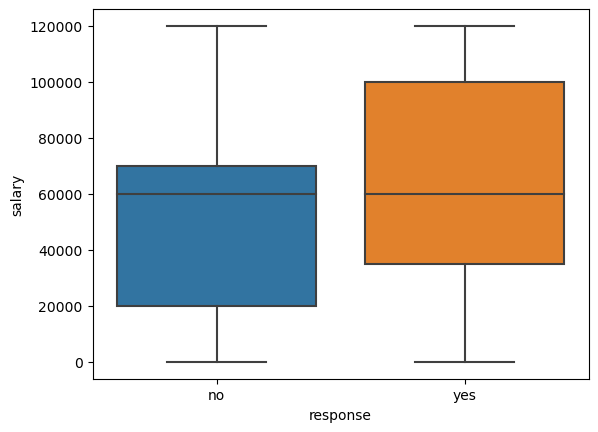

In [197]:
#both mean and median says response remains same irrespective of the persons salary, 
#to be sure lets boxplot them and check the behavior
sns.boxplot(x= df.response, y=df.salary);

In [218]:
#This is how we analyze Numeric-Categorical variables, 
#we use mean, median, and Box Plots to draw some sort of conclusions.

In [198]:
# boxplot tells that  IQR for customers who gave positive answer are on higher salary side 

In [199]:
# for response column definitely education and  marital status is possibly associated. 
#first lets convert 'yes'/'no' to 1/0
df['response_rate']= np.where(df.response =='yes',1,0)

In [204]:
df.response_rate.value_counts()

0    39894
1     5287
Name: response_rate, dtype: int64

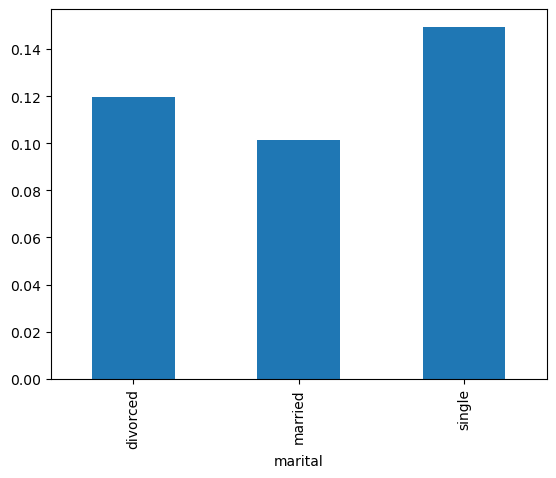

In [208]:
#check for marital status
df.groupby('marital')['response_rate'].mean().plot.bar();

In [209]:
#we can infer that singles gave more positive answer than others.

In [ ]:
#we can do run this process with Loan vs Response rate, Housing Loans vs Response rate.

# Multivariate Analysis

In [212]:
# to see how education , marital and response_rate vary with each other we should use heatmap.
result = pd.pivot_table(data=df, index='education',columns= 'marital', values='response_rate')
result

marital,divorced,married,single
education,,,
primary,0.138482,0.075573,0.106682
secondary,0.103448,0.094681,0.129271
tertiary,0.138001,0.129798,0.183622
unknown,0.142012,0.122519,0.162879


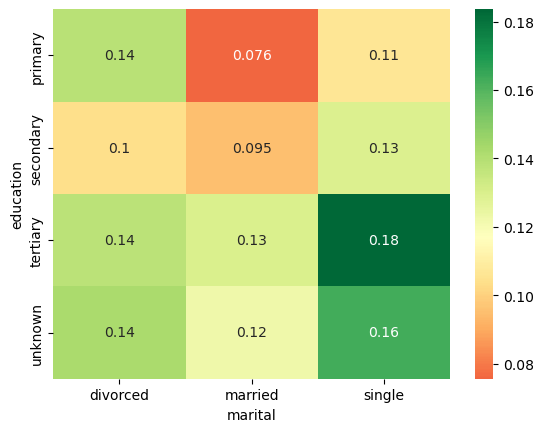

In [217]:
sns.heatmap(data= result, annot=True, cmap='RdYlGn', center = 0.117);

In [ ]:
#we can say that married people with primary education is less likely to respond positively and 
#singles with tertiary are most likeli to respond positively.

In [ ]:
#we can do this process with job vs marital vs response